# Workshop 01 - Introduction to Pandas & Scikit-Learn

In [1]:
# Import pandas 
import pandas as pd
import numpy as np

### Content

+ Core Concepts
+ Reading Files
+ Fundamental Operations 
    1. Viewing Data Frames
    2. General Information about a Data Frame
    3. Summary Statistics of a Data Frame 
    4. Slicing and Extraction 
    
+ Machine Learning with Scikit-Learn

### Core Concepts: Series and DataFrames

In [2]:
# Note: A series represents a "column" - a data frame is a collection of multiple series

# Let's create a dict and transform it into a data frame
data = {
    'grade': [1, 2, 3, 1],
    'mat_id': ['45', '12', '14', '15']
}

# Creates a dictionary
df = pd.DataFrame(data)

In [3]:
# Display the content of data frame
df

,grade,mat_id
0,1,45
1,2,12
2,3,14
3,1,15


In [4]:
# Customize the index of the data frame (which is helpful if we want to select certain rows)

df = pd.DataFrame(data, index=['Julia', 'Peter', 'Ali', 'Nicole'])

# and display the content 
df

,grade,mat_id
Julia,1,45
Peter,2,12
Ali,3,14
Nicole,1,15


In [5]:
# Armed with this customized index, we can now "locate" rows by our custom index (student names)
df.loc['Nicole']

grade      1
mat_id    15
Name: Nicole, dtype: object

In [6]:
# Also, you can access the values (e.g., grade) directly
df.loc['Nicole'].grade

1

### Reading Files

Often, we don't generate our data in Python script but obtain data from other sources such as databases, datalakes, data warehouses etc. Thus, we need proper methods to read data from different kind of sources.

#### Reading CSV files

In [7]:
# You can pass either an absolute path or a relative path
# Relative to the current working directory (i.e., the directory from which the notebook was started)
df = pd.read_csv('data/sample_data.csv') 

# Display content
df

,Unnamed: 0,grade,mat_id
0,Julia,1,45
1,Peter,2,12
2,Ali,3,14
3,Nicole,1,15


Since CSV files don't work with indexes, we have to specify it while reading the csv file.

In [9]:
df = pd.read_csv('data/sample_data.csv', index_col=0) 

# Backup dataframe... (ignore this)
df_bak = df

# Voila
df

,grade,mat_id
Julia,1,45
Peter,2,12
Ali,3,14
Nicole,1,15


#### Reading JSON files

The vast majority of Internet communication is based on the JSON format. Reading and processing JSON files is thus crucial. 

In [10]:
# Lucky we: Pandas offers an easy-to-use method to read json files.
df = pd.read_json('data/sample_data.json')

# Display content
df 

,grade,mat_id
Julia,1,45
Peter,2,12
Ali,3,14
Nicole,1,15


### Fundamental Operations

In [11]:
# Read sample data
df = pd.read_csv('data/sample_data.csv', index_col=0) 
df

,grade,mat_id
Julia,1,45
Peter,2,12
Ali,3,14
Nicole,1,15


#### 1. Viewing data

In [13]:
# To get a first impression of the data, we can use the function head() - which returns us the first ten rows.
df.head(2)

,grade,mat_id
Julia,1,45
Peter,2,12


In [12]:
# Of course, you can specify how many rows you want to obtain.
df.head(n=2) # or, for the sake of brevity, df.head(n)

,grade,mat_id
Julia,1,45
Peter,2,12


In [14]:
# Or all rows but the last line...
df.head(-1) # <-- Note, we passed a negative integer. 

,grade,mat_id
Julia,1,45
Peter,2,12
Ali,3,14


In [15]:
# Sometimes we are more interested in the last rows of a file. For example: log files

In [16]:
df.tail(n=2) # returns the last two rows

,grade,mat_id
Ali,3,14
Nicole,1,15


In [17]:
df.sample(3)

,grade,mat_id
Ali,3,14
Julia,1,45
Nicole,1,15


#### 2. Getting general info about your data 

Without discussion: this command should be executed right after loading the data

In [19]:
# Return an overview of your dataframe (incl. columns and their data types)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Julia to Nicole
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   grade   4 non-null      int64
 1   mat_id  4 non-null      int64
dtypes: int64(2)
memory usage: 96.0+ bytes


In [20]:
# The shape of your data is also a useful information

df.shape # return a tuple (n, m) where n is the number of rows and m the number of columns

(4, 2)

#### 3. Duplicates

Sorry to disappoint you but data will be messy in the real world. Duplicates are one of many example of unclean data.

In [21]:
# Artificially create a dataset with duplicates
df_dup = df.append(df) 

#Display content
df_dup

/var/folders/tm/rzk5w14x43s6q7sgpkq2r7wc0000gn/T/ipykernel_42867/2364005270.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_dup = df.append(df)


,grade,mat_id
Julia,1,45
Peter,2,12
Ali,3,14
Nicole,1,15
Julia,1,45
Peter,2,12
Ali,3,14
Nicole,1,15


Ups, that was our first warning. A deprecation warning doesn't mean you can't use that function but it is better to prepare for future version releases. Let's use the proposed `pandas.concat` function.

In [22]:
# Artificially create a dataset with duplicates
# use 'ignore_index=False' to keep the index, even though there are duplicates
# use 'axis='index' to concat by rows (vs by columns)
df_dup = pd.concat([df,df], ignore_index=False, axis='index')

#Display content
df_dup

,grade,mat_id
Julia,1,45
Peter,2,12
Ali,3,14
Nicole,1,15
Julia,1,45
Peter,2,12
Ali,3,14
Nicole,1,15


In [21]:
# It is important to note that many data frame operations are not "in place" per default, 
# i.e., the original data frame remains untouched
df

,grade,mat_id
Julia,1,45
Peter,2,12
Ali,3,14
Nicole,1,15


In [23]:
# Now, let's get rid of duplicates
df_dup.drop_duplicates()

df_dup

,grade,mat_id
Julia,1,45
Peter,2,12
Ali,3,14
Nicole,1,15
Julia,1,45
Peter,2,12
Ali,3,14
Nicole,1,15


In [24]:
# Something went wrong here...

# We have to assign the result of the drop_duplicates to our df_dup dataframe
# because this operation is not "inplace" per default 

df_dup = df_dup.drop_duplicates()

df_dup

,grade,mat_id
Julia,1,45
Peter,2,12
Ali,3,14
Nicole,1,15


In [25]:
# Okay - looks good, but sometimes this might be annoying or we don't have enough RAM.

# Again, artificially create a dataset with duplicates
df_dup = pd.concat([df,df])

# Drop Duplicates without reassigning the result
df_dup.drop_duplicates(inplace=True)

df_dup

,grade,mat_id
Julia,1,45
Peter,2,12
Ali,3,14
Nicole,1,15


In [26]:
# Another important parameter for drop_duplicates is "keep". 
# For example, if you want to remove all duplicate rows (and don't want to keep the first occurance):

# Create duplicates and if one row pertains to a duplicate remove it.
df_dup = pd.concat([df,df])
df_dup.drop_duplicates(inplace=True, keep=False)

# This will result in an empty dataframe - as expected.
df_dup

,grade,mat_id


#### 4. Column names

Often, you will encouter files with weird and/or cryptical column names. Changing column names is quite easy with Pandas.

In [27]:
# List all colum names
df.columns

# mat_id is obviously vague

Index(['grade', 'mat_id'], dtype='object')

In [28]:
# Renaming columns
df.rename(columns={"mat_id":"Matriculation_id"}, inplace=True)

df

,grade,Matriculation_id
Julia,1,45
Peter,2,12
Ali,3,14
Nicole,1,15


In [29]:
# Lower casing all column names
all_columns = df.columns

lower_cased_columns = [col.lower() for col in all_columns] # lower cases all column names
 
df.columns = lower_cased_columns # assign new column names to data frame

df.columns

Index(['grade', 'matriculation_id'], dtype='object')

#### 5. Handling missing values

When working with real world data, you will encouter many times missing values in your data. 

Two popular approaches to handle missing values (e.g., null values):
    1. Remove rows/columns with missing values
    2. Impute data (i.e., replace null values)

In [30]:
# Set the grade of Ali to null to simulate missing data
df.loc['Ali', 'grade'] = None

In [32]:
df

,grade,matriculation_id
Julia,1.0,45
Peter,2.0,12
Ali,NaN,14
Nicole,1.0,15


In [33]:
# Analyze how many rows have null values
df.isnull().sum()

grade               1
matriculation_id    0
dtype: int64

In [34]:
# Drop rows containing null values (returns a copy of the dataframe)
df_dropped_rows = df.dropna() # df.dropna(axis=0) <- removes rows

# Display 
df_dropped_rows


,grade,matriculation_id
Julia,1.0,45
Peter,2.0,12
Nicole,1.0,15


In [35]:
# Drop columns containing null values
df_dropped_cols = df.dropna(axis=1)  # <- removes columns (axis=1)

# Display dataframe
df_dropped_cols

,matriculation_id
Julia,45
Peter,12
Ali,14
Nicole,15


##### Imputation

In [36]:
# Get grades Series
grades = df['grade']

# Compute mean
grades.mean()

1.3333333333333333

In [37]:
# Replace NULL values with the imputed value
grades.fillna(grades.mean(), inplace=True)

#Display 
df

,grade,matriculation_id
Julia,1.000000,45
Peter,2.000000,12
Ali,1.333333,14
Nicole,1.000000,15


In [38]:
# Tadaaaaa - looks good.
df.isna().sum()

grade               0
matriculation_id    0
dtype: int64

#### Describe your columns (summary statistics)

In [39]:
# Get summary of cont. variables
df.describe()

,grade,matriculation_id
count,4.000000,4.000000
mean,1.333333,21.500000
std,0.471405,15.716234
min,1.000000,12.000000
25%,1.000000,13.500000
50%,1.166667,14.500000
75%,1.500000,22.500000
max,2.000000,45.000000


In [41]:
# Hmmm - Matriculation ID missing. Why?
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Julia to Nicole
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   grade             4 non-null      float64
 1   matriculation_id  4 non-null      int64  
dtypes: float64(1), int64(1)
memory usage: 268.0+ bytes


In [42]:
# Makes sense - Mat Id is not a continuous variable!

In [43]:
# Count how often a matriculation id occurs in this data frame. 
df['matriculation_id'].value_counts()

45    1
12    1
14    1
15    1
Name: matriculation_id, dtype: int64

### Handling with parts of the data - Slicing, Extraction, Selection

In [45]:
# Some confusing stuff you will for sure encounter on Stackoverflow
# What is the difference between df['grade'] vs df[['grade']]? 

##### Selecting Columns

In [46]:
# Selecting Columns
grades = df['grade']

type(grades)

pandas.core.series.Series

In [48]:
grades = df[['grade']]

type(grades)

pandas.core.frame.DataFrame

In [49]:
# Okay - got it! Single Brackets => Series, Double Brackets => Data Frame

#### Selecting Rows

In [51]:
# Selecting rows by index
julia = df.loc['Julia'] # Row for Julia
display(julia)

# iLoc is not an Apple product...
# But still useful...

julia_by_idx = df.iloc[0] # Select rows by numerical index (starting from 0)
display(julia_by_idx)

grade                1.0
matriculation_id    45.0
Name: Julia, dtype: float64

grade                1.0
matriculation_id    45.0
Name: Julia, dtype: float64

#### Selecting Multiple Rows

In [52]:
# Select rows from Julia to Ali
subset = df.loc['Julia':'Peter']

subset

,grade,matriculation_id
Julia,1.0,45
Peter,2.0,12


In [53]:
# Select rows from Julia to Ali with numerical idx (similar to regular Python)
subset = df.iloc[0:2]

subset

,grade,matriculation_id
Julia,1.0,45
Peter,2.0,12


#### Conditional Selections (Filtering)

In [54]:
# How do we select rows with certain characteristics?
condition = (df['grade'] < 2)

condition.head()

Julia      True
Peter     False
Ali        True
Nicole     True
Name: grade, dtype: bool

In [55]:
# Filter data frame based on this boolean result

df[condition]

,grade,matriculation_id
Julia,1.000000,45
Ali,1.333333,14
Nicole,1.000000,15


In [56]:
# or directly
df[(df['grade']<2)]

,grade,matriculation_id
Julia,1.000000,45
Ali,1.333333,14
Nicole,1.000000,15


In [57]:
# Combining multiple statements
# & - And Operator
# | - OR Operator  

# We have to cast it to int64, otherwise equals operator does not work
df['matriculation_id'] = df['matriculation_id'].astype('int64')

# Filter columns by grade and mat id
condition = (df['grade'] < 2) & (df['matriculation_id']==45)

df[condition]

,grade,matriculation_id
Julia,1.0,45


In [58]:
# is in operator; select only those rows whose mat ids are present in the following list [14, 15]

# mat id for exchange students 
exchange_students = [14, 15]

df[df['matriculation_id'].isin(exchange_students)]

,grade,matriculation_id
Ali,1.333333,14
Nicole,1.000000,15


### Apply Function 

Avoid to loop through the rows with simple for loops; rather use the apple method:

In [59]:
def good_student(grade): 
    if grade == 1.0:
        return "Good"
    else:
        return "Disappointing, Potter"

# Add new column teacher_feedback

# Pass entire column 
#df['teacher_feedback'] = df['grade'].apply(good_student)

# or, one row at a time
df['teacher_feedback'] = df.apply(lambda row: good_student(row[0]), axis=1)

df

,grade,matriculation_id,teacher_feedback
Julia,1.000000,45,Good
Peter,2.000000,12,"Disappointing, Potter"
Ali,1.333333,14,"Disappointing, Potter"
Nicole,1.000000,15,Good


## Machine Learning with Scikit Learn

In [60]:
# Source: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [61]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [62]:
# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

In [63]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

In [64]:
# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

In [65]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [66]:
# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

In [67]:
# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


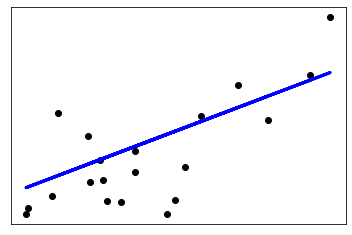

In [68]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()